## 공급을 통해 부동산 살펴보기

### 1. 공급량이 부동산 가격에 미치는 영향

수요가 시장에서 특정 재화를 사람들이 원하는 정도라고 한다면, 공급은 시장에서 제공되는 재화의 양이라고 정의할 수 있다.

### 2. 부동산 공급 측정을 위한 데이터

살펴볼 데이터는 '인허가' 데이터이다. 인허가 데이터는 '부동산 통계정보 시스템 (https://www.r-orne.co.kr/) 이라는 사이트에서 내려 받을 수 있다.

### 3. 파이썬으로 공급 데이터 분석

+ 인허가 데이터를 읽어와 데이터 프레임으로 정리

In [2]:
# 인허가 엑셀 데이터를 read_excel로 읽어오기

import pandas as pd

permission_path = r'데이터\주택건설인허가실적.xlsx'
pd.read_excel(permission_path)

,* 통계표명 :,주택건설인허가실적,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163
0,* 수록기간 :,2007년 01월 ~ 2020년 07월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,* 조회기간 :,2007년 01월 ~ 2020년 07월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* 출처 :,국토교통부,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,* 자료다운일자 :,2020.09.22 13:06:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,* 단위 :,건,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,지 역,2007년 01월,2007년 02월,2007년 03월,2007년 04월,2007년 05월,2007년 06월,2007년 07월,2007년 08월,2007년 09월,...,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월


데이터는 11행부터 시작한다. read_excel 함수에 skip_row=10 이라는 옵션을 추가

In [3]:
# skip_row를 통해 필요없는 행은 skip을 해주자.

permission_raw = pd.read_excel(permission_path, skiprows=10, index_col=0)

데이터프레임에서 날짜는 인덱스에 설정하기 위해 컬럼과 행을 바꾼다. 전치행렬을 뜻하는 T를 붙여서 컬럼과 행을 바꾸어준다.

In [5]:
# permission_df의 행과 열을 바꾸기

transposed_permission = permission_raw.T

In [7]:
transposed_permission

지 역,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007년 01월,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007년 02월,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007년 03월,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007년 04월,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007년 05월,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020년 03월,33648,4617,1091,2185,457,1195,2172,1023,28,11368,1062,370,2668,555,2116,1065,929,747
2020년 04월,31884,4340,1194,3206,368,1205,475,73,1024,9423,1611,290,1014,1050,941,2010,3303,357
2020년 05월,28279,4124,717,824,1479,1439,72,47,69,10135,1834,326,2190,274,3354,486,511,398
2020년 06월,33079,3659,4793,3042,1945,760,3198,683,37,9651,1404,290,918,842,670,506,405,276


Pandas는 년이나 월을 인식하지 못한다. 예를들어 2007년 01월을 알지 못한다. 그러나 '2007.1.1'이나 2007.1'은 년 월 일 로 인식한다. 년도 4글자와 월 2글자 사이에 '.'을 추가해준다.

In [8]:
# 인덱스를 '연도.날짜' 형식으로 바꾸기

new_index = []

for old_date in transposed_permission.index:
    temp_list = old_date.split(' ')
    new_index.append(temp_list[0][:4] + '.' + temp_list[1][:2])

In [17]:
# 인덱스를 새로 설정하고 데이터프레임 완성하기

transposed_permission.index = pd.to_datetime(new_index)
transposed_permission.columns.name = None

In [21]:
transposed_permission

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-01-01,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007-02-01,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007-03-01,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007-04-01,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007-05-01,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,33648,4617,1091,2185,457,1195,2172,1023,28,11368,1062,370,2668,555,2116,1065,929,747
2020-04-01,31884,4340,1194,3206,368,1205,475,73,1024,9423,1611,290,1014,1050,941,2010,3303,357
2020-05-01,28279,4124,717,824,1479,1439,72,47,69,10135,1834,326,2190,274,3354,486,511,398
2020-06-01,33079,3659,4793,3042,1945,760,3198,683,37,9651,1404,290,918,842,670,506,405,276


입력으로 인허가 데이터의 위치와 파일 이름 정보가 담긴 문자열 데이터를 path 로 받은 다음 데이터프레임으로 반환하는 함수를 만든다.

In [22]:
# 인허가 데이터를 데이터프레임으로 변환하는 함수 정의

def permission_preprocessing(path):
    permission_raw = pd.read_excel(path, skiprows=10, index_col=0)
    transposed_permission = permission_raw.T
    
    new_index = []

    for old_date in transposed_permission.index:
        temp_list = old_date.split(' ')
        new_index.append(temp_list[0][:4] + '.' + temp_list[1][:2])
        
    transposed_permission.index = pd.to_datetime(new_index)
    transposed_permission.columns.name = None
    
    return transposed_permission

+ 함수들을 활용해서 인허가, 매매가 지수, 전세가 지수 데이터프레임 만들기

매매가, 전세가 지수를 데이터프레임으로 가져온다. KBpriceindex_preprocessing() 함수를 활용한다.

In [40]:
# KBpriceindex_preprocessing 함수 가져오기

import xlwings as xw

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : 시트 name
    # data_type : '매매종합', '매매 APT', '매매연립', '매매단독', '전세종합' \
                         #  ,전세 APT', '전세연립', '전세단독' 중 하나
    
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range(1,1).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1]) # 필요없는 행을 지워준다.
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    #axis = 0 : 행방향동작 , axis = 1 : 열방향 동작
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [48]:
# 앞에서 정의한 함수들을 이용해 데이터 전처리하고 데이터프레임으로 가져오기

permission_path = r'데이터\주택건설인허가실적.xlsx'
permission = permission_preprocessing(permission_path)
kb_path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
price_index = KBpriceindex_preprocessing(kb_path, '매매종합')
jun_index = KBpriceindex_preprocessing(kb_path, '전세종합')

In [51]:
# 그래프를 위한 설정

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style

style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥 OS인 경우 위 두 줄을 입력하지 않고 아래 코드를 입력하면 된다.
# rc('font', family='AppleGothc')
plt.rcParams['axes.unicode_minus'] = False

+ 매매가 지수와 인허가 데이터를 함께 그래프로 나타낸다.

매매가 지수와 인허가 데이터의 그래프를 함께 그려야 한다. 매매가 지수와 인허가 데이터가 하나의 y축을 공유하면 두 데이터 간의 단위 차이가 크게 나므로 올바른 그래프가 그려지지 못한다. 이럴 때 2개의 y축을 만들어 각각 다른축에 매매가 지수의 데이터와 인허가 데이터의 값을 표시해야 한다.

이렇게 두개의 y축을 가진 그래프를 그린다.

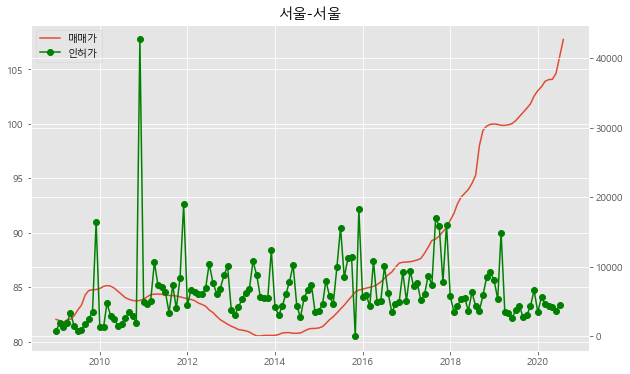

In [54]:
# 서울의 인허가 매매가 지수의 움직임을 그래프로 나타내기

plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가')
ln2 = ax2.plot(permission[si]['2009-1':], label='인허가', color='green',marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

plt.show()

+ 인허가 데이터를 1년 단위로 묶어서 2년 앞으로 옮기기

인허가 데이터를 월별 선형 그래프로 나타냇더니 상승이나 하락 추세를 파악하기 어렵다. 이를 년으로 묶어서 살펴본다. 그리고 인허가 데이터가 실제로 부동산 시장에 반영되는 시점은 2년에서 3년 뒤이다.

따라서 그래프를 2년 뒤로 옮겨준다.

Pandas 의 groupby() 함수가 데이터프레임을 그룹별로 분류하는 역할을 한다. 연도별 총 인허가량을 보기 위해 sum() 함수를 하용한다.

In [59]:
# 인허가 데이터 연도별로

year_permission = permission.groupby(permission.index.year).sum()

In [60]:
year_permission

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007,555792,62842,41254,18174,41571,13088,11180,24507,198138,10677,19983,29317,11842,15255,24285,31503,2176
2008,371285,48417,13594,22880,33632,3945,14556,5897,115531,13235,10014,21657,12063,10849,15881,24375,4759
2009,381787,36090,6506,6645,59519,5024,1849,6728,159549,12312,11537,22860,11634,8984,13316,17119,2115
2010,386542,69190,18331,4724,37477,4487,4034,4904,143551,9312,8504,15331,12299,17599,13684,18234,4881
2011,549594,88060,37256,12462,35905,16059,19736,13146,148191,12989,18010,46794,16117,15576,16936,39339,13018
2012,586884,86123,42333,13012,32132,19584,6708,9751,151035,12156,24773,44450,24288,22222,25713,44760,10256
2013,440116,77621,29922,18078,18907,8454,5180,5344,96082,12964,19267,32343,13179,20061,23878,34683,6309
2014,515251,65249,17210,19079,13583,11056,5073,12502,163057,12977,16391,35564,13768,17628,41438,49424,8805
2015,765328,101235,33535,27118,30590,14673,7987,12459,276948,18868,31125,40311,22552,15631,53046,45325,18690
2016,726048,74739,36664,23169,22186,22796,13509,16325,244237,29489,29516,31800,28737,20983,36551,61124,21596


2년 뒤로 옮기기 위해 year_permission 데이터프레임 전체를 두 행씩 밑으로 내린다. -> shift()함수를 사용

인덱스를 날짜로 만드는 코드는 단순히 연도만 2008, 2009, ... 과 같이 존재하면 파이썬이 시간 형식으로 인식하지 못해서 이를 '2008-7-1'과 같이 시간 데이터로 바꾸어 주어야 한다.

In [61]:
# 인허가 데이터를 2년 뒤로 옮기기

modified_permission = year_permission.shift(2)
temp = []
for year in modified_permission.index:
    temp.append(str(year) + '-7-1')
modified_permission.index = pd.to_datetime(temp)
modified_permission

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-01,555792.0,62842.0,41254.0,18174.0,41571.0,13088.0,11180.0,24507.0,198138.0,10677.0,19983.0,29317.0,11842.0,15255.0,24285.0,31503.0,2176.0
2010-07-01,371285.0,48417.0,13594.0,22880.0,33632.0,3945.0,14556.0,5897.0,115531.0,13235.0,10014.0,21657.0,12063.0,10849.0,15881.0,24375.0,4759.0
2011-07-01,381787.0,36090.0,6506.0,6645.0,59519.0,5024.0,1849.0,6728.0,159549.0,12312.0,11537.0,22860.0,11634.0,8984.0,13316.0,17119.0,2115.0
2012-07-01,386542.0,69190.0,18331.0,4724.0,37477.0,4487.0,4034.0,4904.0,143551.0,9312.0,8504.0,15331.0,12299.0,17599.0,13684.0,18234.0,4881.0
2013-07-01,549594.0,88060.0,37256.0,12462.0,35905.0,16059.0,19736.0,13146.0,148191.0,12989.0,18010.0,46794.0,16117.0,15576.0,16936.0,39339.0,13018.0
2014-07-01,586884.0,86123.0,42333.0,13012.0,32132.0,19584.0,6708.0,9751.0,151035.0,12156.0,24773.0,44450.0,24288.0,22222.0,25713.0,44760.0,10256.0
2015-07-01,440116.0,77621.0,29922.0,18078.0,18907.0,8454.0,5180.0,5344.0,96082.0,12964.0,19267.0,32343.0,13179.0,20061.0,23878.0,34683.0,6309.0
2016-07-01,515251.0,65249.0,17210.0,19079.0,13583.0,11056.0,5073.0,12502.0,163057.0,12977.0,16391.0,35564.0,13768.0,17628.0,41438.0,49424.0,8805.0


+ 수정한 인허가 데이터와 매매가 지수를 함께 그래프로 나타낸다.

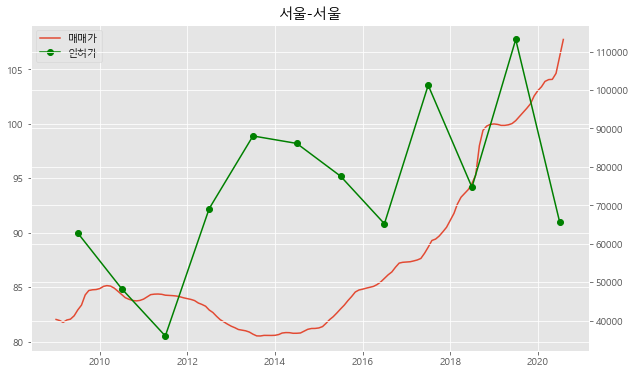

In [63]:
# 수정한 인허가 데이터와 매매가 지수 그래프

plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가')
ln2 = ax2.plot(modified_permission[si]['2009':], label='인허가', color='green', marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

plt.show()

+ 전세가 지수 데이터를 추가해서 그래프로 나타낸다

전세가 지수 데이터를 추가 해 준다. 인허가 그래프는 ls='--' 옵션을 추가해 선을 점선으로 만들어 준다.

데이터의 값 자체가 아니라 변화율을 보고 싶다면 pandas의 pct_change() 함수를 이용한다. 연간 변화율을 계산하기 위해 pct_change(!2)라는 옵션을 추가한다.

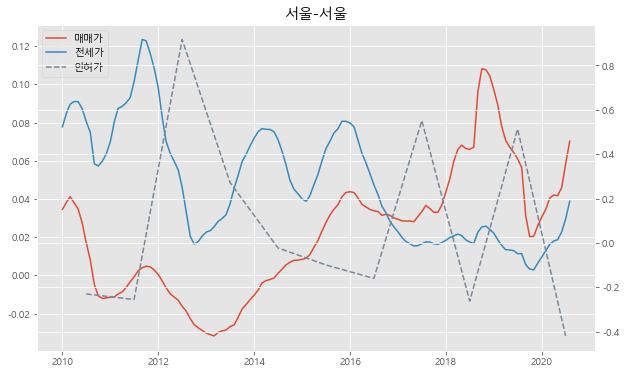

In [64]:
# 변화율로 살펴보는 그래프

plt.figure(figsize=(10,6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si + '-' + gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':].pct_change(12), label='매매가')
ln2 = ax.plot(jun_index[si][gu]['2009-1':].pct_change(12), label='전세가')
ln3 = ax2.plot(modified_permission[si]['2009':].pct_change(), label='인허가', color='lightslategray', ls='--')
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns ]
ax.legend(lns, labs, loc='upper left')

plt.show()

+ 수요 전략에 인허가 데이터를 추가한다

In [65]:
# demand 함수를 실행해 결과 저장

from datetime import datetime
from dateutil.relativedelta import relativedelta

def demand(price_index, jeonse_index, index_date, time_range):
    
    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)
    
    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date]
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date]
    
    # 3년기준 이전 최댓값과 최댓값대비 증감률
    demand_df['이전최댓값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최댓값']) / demand_df['이전최댓값'].replace(0,None)

    # 이전최댓값*0.97 과 그 기준 대비 증감률을 뽑아본다.
    # 최근에 부동산의 가격이 살짝 꺾여서 기준치를 살짝 낮추어 주기 위해
    demand_df['이전최댓값*0.97'] = price_index[prev_date2:index_date][:-1].max()*0.97
    demand_df['최댓값*0.97증감률'] = (price_index.loc[index_date] - demand_df['이전최댓값*0.97']) / demand_df['이전최댓값*0.97'].replace(0,None)
    
    # 매매가 지수와 전세가 지수의 상승여부를 계산해 demand_df에 저장
    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['0.97대비상승'] = demand_df['최댓값*0.97증감률'] > 0
    
    # 전세가 지수 상승이 매매가 지수 상승보다 빠른 지와
    # 기준 날짜의 매매가 지수 값이 지난 3년의 최댓값보다 큰지 계산하여 demand_df에 저장
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    # 지역별로 수요 조건의 총합 구하기

    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승','0.97대비상승']].sum(axis=1)
    demand_df = demand_df[demand_df['수요총합'] == 4]
    
    # 시군 단위의 인덱스만 남기기

    selected_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            selected_index.append((name[0], name[1]))

    demand_df = demand_df.loc[selected_index]
    
    return demand_df

index_date = datetime(2013, 1, 1)
time_range = 12
demand_1 = demand(price_index, jun_index, index_date, time_range)

In [66]:
demand_1

매매증감률      전세증감률       이전최댓값     최댓값대비증감률  이전최댓값*0.97  \
부산  중구      0.0176124  0.0285175   97.260792   -0.0040204   94.342969   
    서구      0.0193685   0.018456   91.027125   0.00220826   88.296311   
    동래구     0.0115309  0.0373738   84.969136  -0.00206948   82.420062   
    남구      0.0244306  0.0312502   88.236377  -0.00836045   85.589285   
대구  남구      0.0161585  0.0149512   83.159622   0.00318998   80.664834   
대전  대덕구      0.016128  0.0117177   94.438293  0.000364243   91.605145   
울산  중구      0.0655156  0.0784317   92.197341 -0.000172023   89.431420   
    울주군     0.0590466  0.0674766   92.739619  -0.00256592   89.957430   
경기  평택      0.0228135  0.0475883  100.685826 -9.08271e-05   97.665251   
    단원구    0.00155333   0.037694   91.863591  0.000154353   89.107684   
강원  원주      0.0178023  0.0440043   91.312392  -0.00203341   88.573021   
충남  논산      0.0111724  0.0306125   99.689117  -0.00317367   96.698443   
전남  여수      0.0158888  0.0616304   93.763043  -0.00480548   90.950151   
경북  남구      0.0325868  0.0545229   94.018836 -7.70424e-07   91.198271   
경남  마산합포구   0.0200728  0.0688224   97.224416  -0.00636955   94.307684   
    마산회원구   0.0235532  0.0557305   98.590741   -0.0048719   95.633019   
    진해구     0.0120841  0.0241517  104.113867 -0.000184467  100.990451   
    진주     0.00675289  0.0151544   96.416297   0.00105241   93.523808   
제주도 서귀포     0.0244632   0.014421   82.700497   0.00148503   80.219482   

          최댓값*0.97증감률  매매가상승  전세가상승  0.97대비상승  더빠른전세상승  최댓값대비상승  수요총합  
부산  중구      0.0267831   True   True      True     True    False     4  
    서구      0.0332044   True   True      True    False     True     4  
    동래구     0.0287944   True   True      True     True    False     4  
    남구      0.0223088   True   True      True     True    False     4  
대구  남구      0.0342165   True   True      True    False     True     4  
대전  대덕구     0.0313033   True   True      True    False     True     4  
울산  중구      0.0307505   True   True      True     True    False     4  
    울주군     0.0282826   True   True      True     True    False     4  
경기  평택      0.0308342   True   True      True     True    False     4  
    단원구      0.031087  False   True      True     True     True     4  
강원  원주      0.0288315   True   True      True     True    False     4  
충남  논산       0.027656   True   True      True     True    False     4  
전남  여수      0.0259737   True   True      True     True    False     4  
경북  남구       0.030927   True   True      True     True    False     4  
경남  마산합포구   0.0243613   True   True      True     True    False     4  
    마산회원구   0.0259053   True   True      True     True    False     4  
    진해구     0.0307377   True   True      True     True    False     4  
    진주      0.0320128  False   True      True     True     True     4  
제주도 서귀포     0.0324588   True   True      True    False     True     4

매매가와 전세 지수는 지역이 [시도][시군구]와 같이 이중으로 나뉘어 있는데 인허가 데이터는 [시도] 지역만 표시하고 있다. demand 함수의 결과는 위 그림처럼 데이터프레임인데 인덱스가 지역명이다. 지역명은 (시도, 시군구)와 같은 형식으로 돼 있어서 매매가와 전세가 지수 데이터는 시도와 시군구를 다 활용해서 데이터를 선택하지만 인허가 데이터는 시도만 활용해 데이터를 선택한다.

In [82]:
# 컬럼명을 맞추기 위해 인허가 자료의 제주 컬럼을 제주도로 바꾸어 준다.
modified_permission.rename(columns={"제주":"제주도"}, inplace = True)

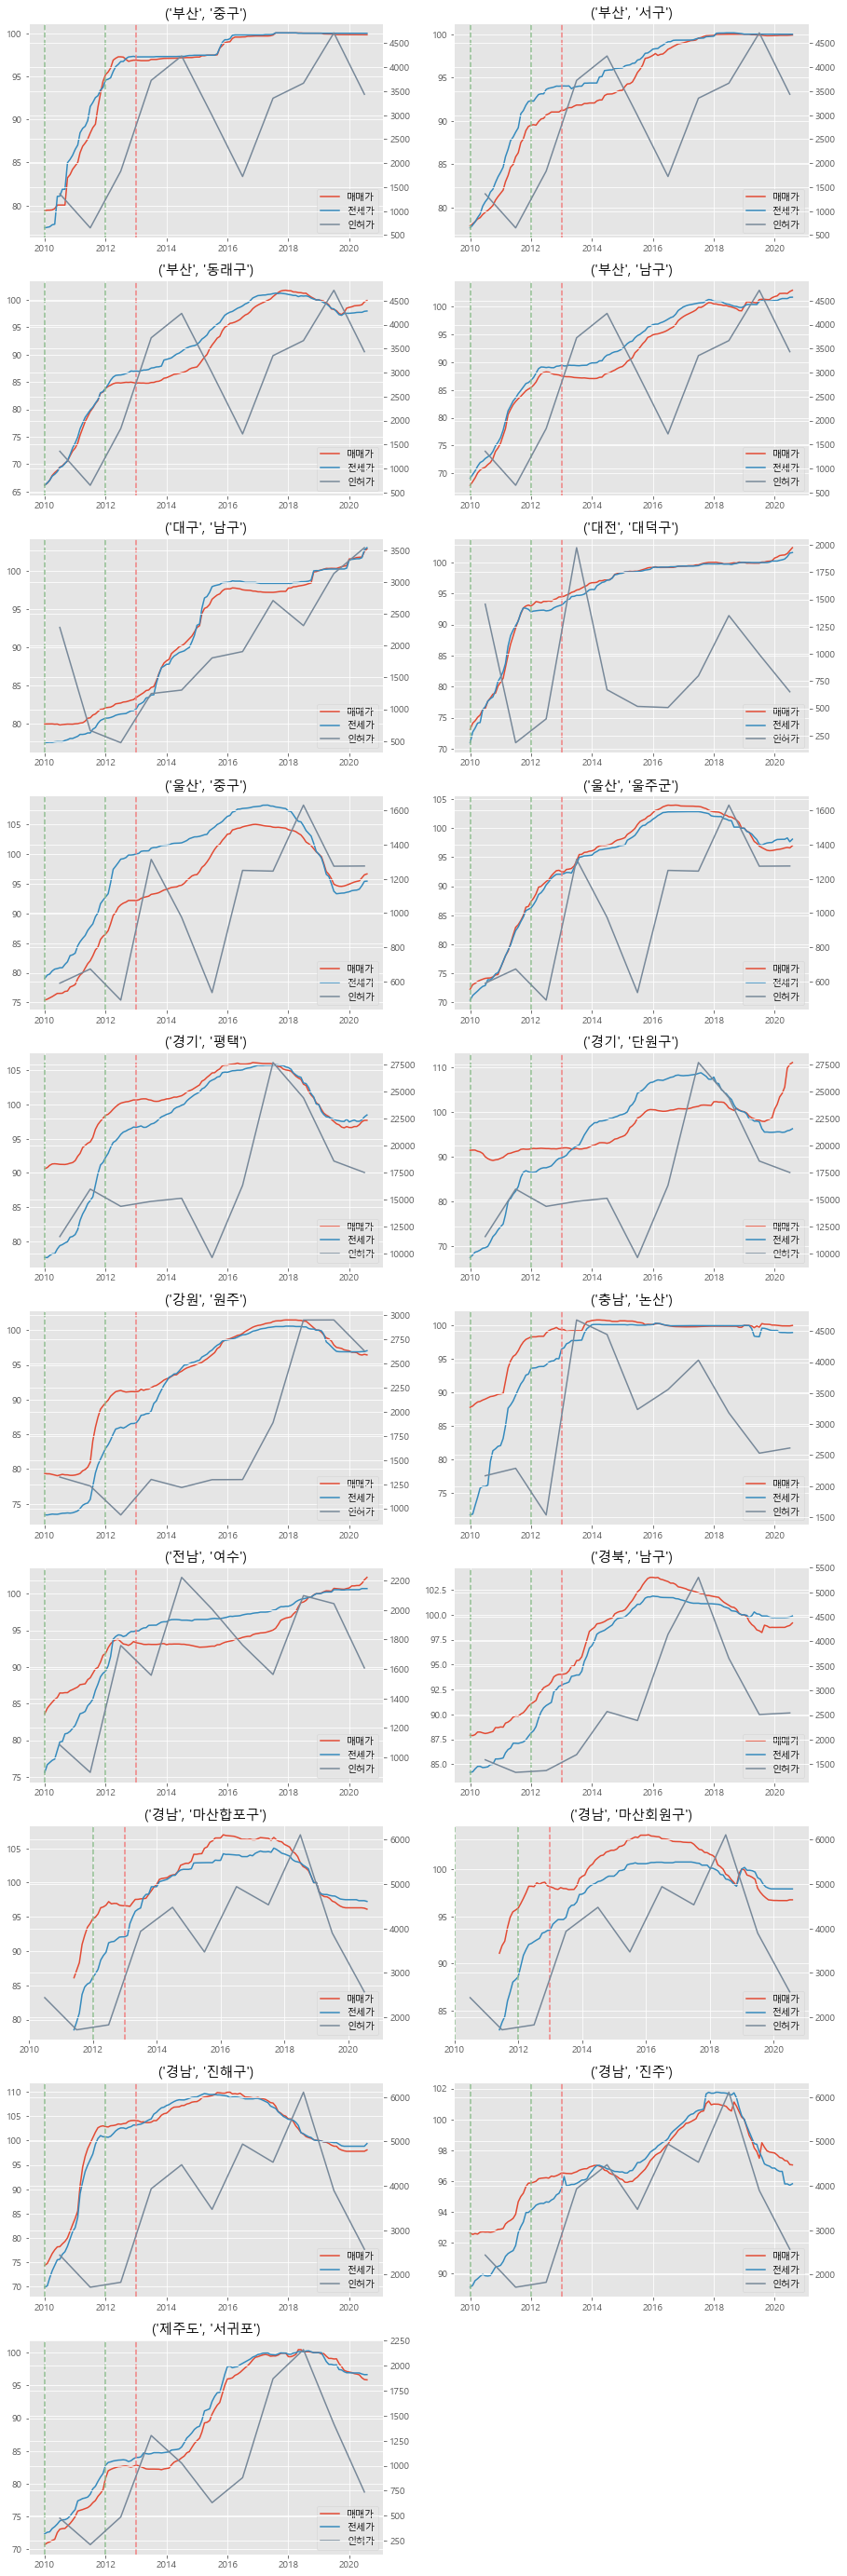

In [83]:
# demand 함수 결과를 인허가 데이터와 함께 보기

prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months=time_range * 3)
graph_start = index_date - relativedelta(months=time_range * 3)

num_row = int((len(demand_1.index)-1)/2)+1

plt.figure(figsize=(15, num_row*5))




for i, spot in enumerate(demand_1.index):
    ax = plt.subplot(num_row, 2, i+1)
    si = spot[0]
    gu = spot[1]
    plt.title(spot)
    ax2 = ax.twinx()
    ln1 = ax.plot(price_index[si][gu][graph_start:], label='매매가')
    ln2 = ax.plot(jun_index[si][gu][graph_start:], label='전세가')
    ln3 = ax2.plot(modified_permission[si][graph_start:]/10, color='lightslategray', label='인허가')
    
    ax.axvline(x=index_date, color='lightcoral', linestyle='--')
    ax.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    ax.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    lns = ln1 + ln2 + ln3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='lower right')
    
plt.show()